## Hi, disini saya mencoba untuk menganalisis data tentang harga penjualan mobil dari latihan yang tersedia di kaggle, untuk link referensinya : https://www.kaggle.com/code/yousefmohamed20/ann-cars-price-prediction/notebook



# IMPORT LIBRARY



In [170]:
# Disini kita memasukkan library yang kita perlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [171]:
# Kemudian disini kita memasukkan sumber data yang akan kita analisa sekalian menampilkan tampilan awal dari datanya
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [172]:
# Dibagian ini kita menghapus kolom nama, email, negara dan gender
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [173]:
# Menampilkan tampilan awal dari data yang telah di edit
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [174]:
# Untuk menampilkan info dari data
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

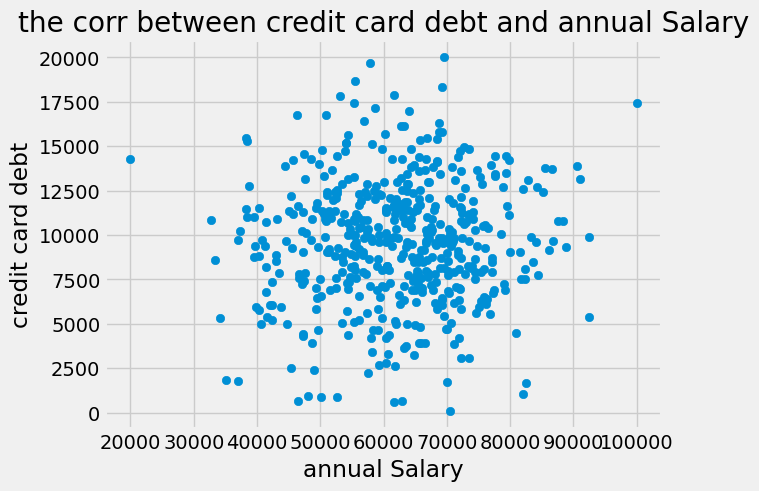

In [175]:
# Membuat plot untuk relasi annual salary dengan credit card debt
# Menggunakan judul the corr between card debt and annual salaary
# Sumbu y dengan credit card debt
# Sumbu x dengan annual salary
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

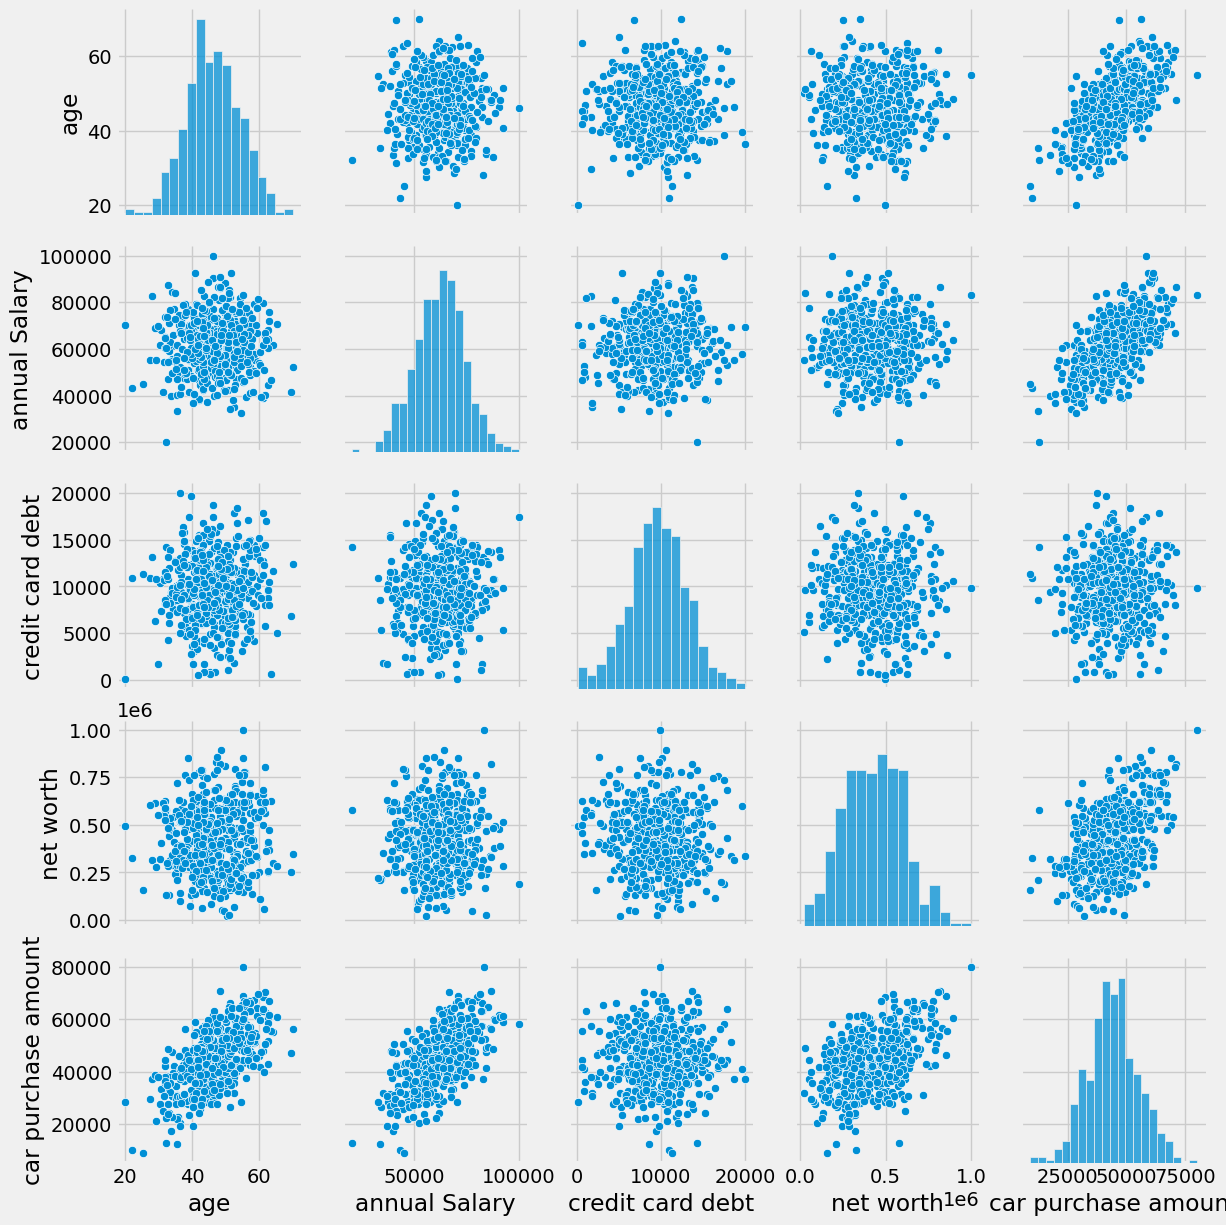

In [176]:
# Menampilkan plot dengan hubungan antara umur, annual salary, credit card deb, net worth dan car purchase amount
sns.pairplot(df)

In [177]:
# Untuk membuat variable x dan y
# variabel x semua kolom kecuali kolom terakhir
# variabel y hanya terakhir
X = df.iloc[:, :-1]
y = df.iloc[:, -1]



# DATA PREPROCESSING





In [178]:
# Disini kita akan preprocessing data
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)



# LINE REGRESSION



In [179]:
# Di bagian ini kita membuat line regression
# Disini juga kita mengecek train dan test score
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999812158076
Test score 0.9999999805506423


In [180]:
# Untuk model regresi linear untuk membuat prediksi (y_pred) berdasarkan data fitur baru (X_test)
y_pred = lreg.predict(X_test)



# ANN Model



In [181]:
# Di bagian ini kita akan menggunakan ann
# disini juga akan dilakukan pengulangan sebanyak 50 kali untuk mencoba metode ann
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.0166 - mean_absolute_error: 0.1013 - val_loss: 0.0088 - val_mean_absolute_error: 0.0757
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0695 - val_loss: 0.0072 - val_mean_absolute_error: 0.0679
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0675 - val_loss: 0.0061 - val_mean_absolute_error: 0.0612
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0591 - val_loss: 0.0062 - val_mean_absolute_error: 0.0625
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0563 - val_loss: 0.0054 - val_mean_absolute_error: 0.0579
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0528 - val_loss: 0.0046 - val_mean_absolute_error: 0.0532
Epoch 7/50
10/10 [=========

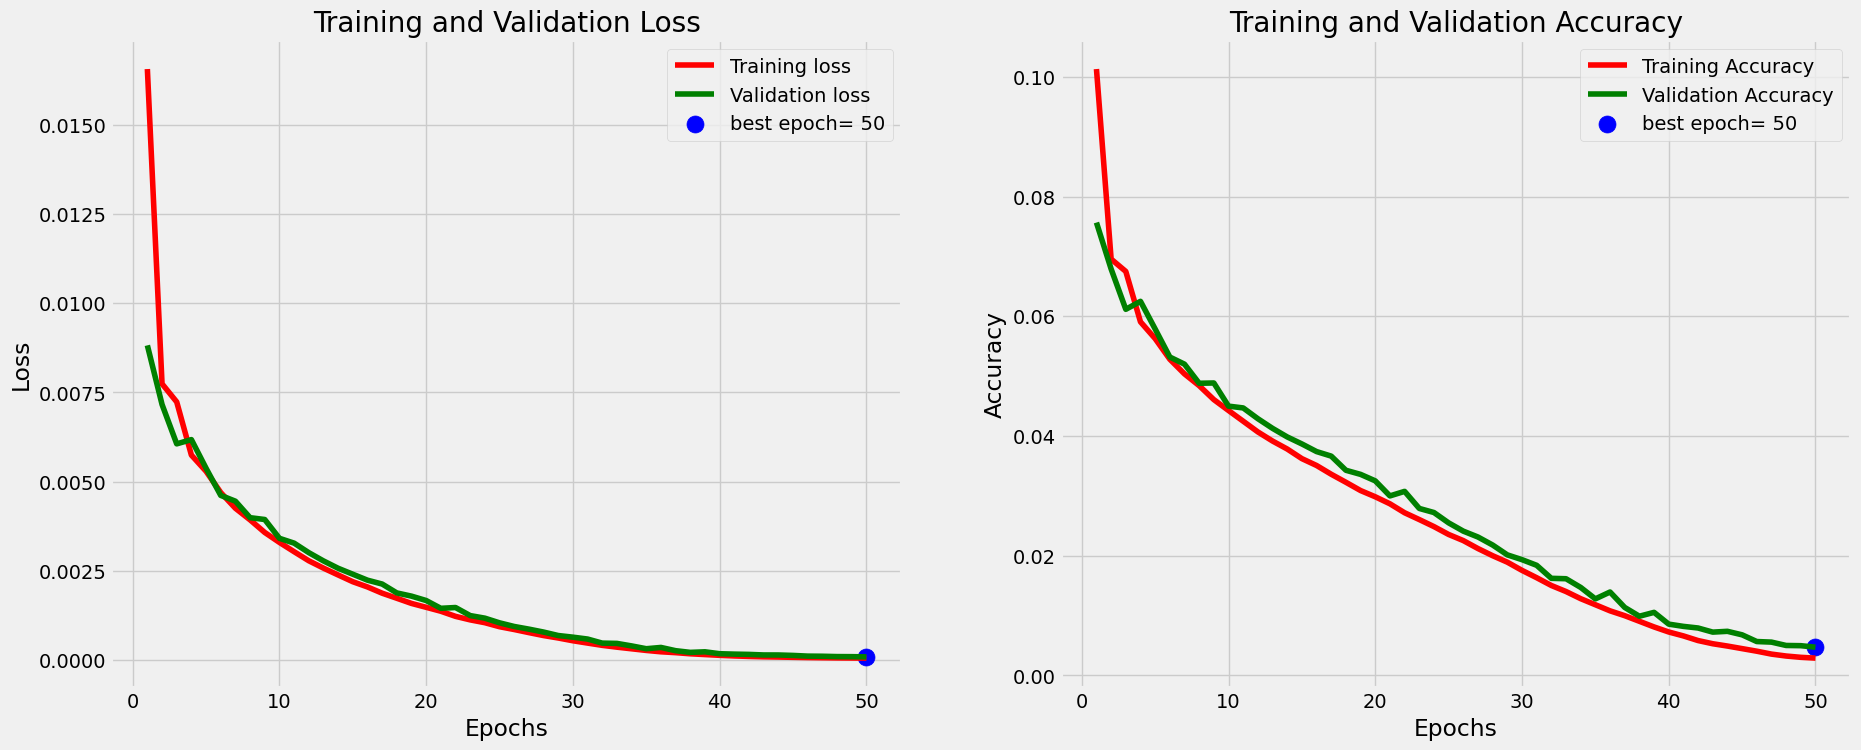

In [182]:
# Pada bagian ini kita akan memplot perbandingan antara training dan validation loss, dan juga training dan validation acuracy
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [183]:
# Untuk melatih model ANN (ann), Anda menggunakan data fitur uji (X_test) untuk menghasilkan prediksi  (ann_y_pred)
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [184]:
# Untuk menghitung dan mencetak nilai R-squared (R2 score) untuk mengevaluasi kinerja model regresi linear
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999805506423


In [185]:
# Untuk mengevaluasi kinerja model ANN pada data uji
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.0227e-05 - mean_absolute_error: 0.0025


[2.022733497142326e-05, 0.0025206964928656816]

In [187]:
# Untuk menggunakan model jaringan saraf tiruan (ann) untuk membuat prediksi berdasarkan data fitur baru dari array yang diinginkan
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 37ms/step


array([[277603.5]], dtype=float32)

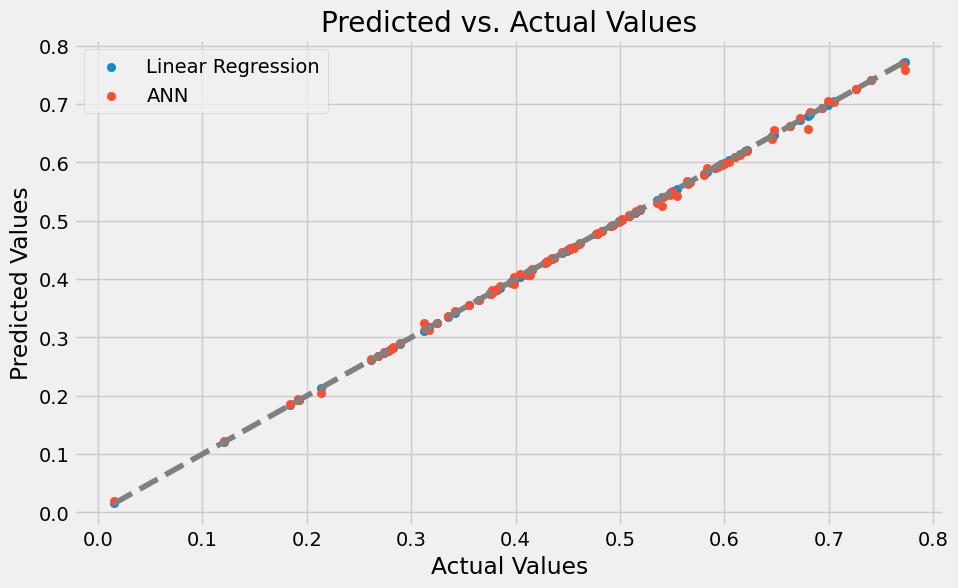

In [188]:
# Kemudian kita akan membuat plot line regression antara predicted dan actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()



# CLONCUSIONS






1.   CONVERT DATA



In [189]:
# Disini di konvert dulu karena data kita kontinu dimana kalau mau dimasukkan ke matriks konfusion harus binary
y_test_binary = (y_test >= 0.5).astype(int)




2.   Membuat Matriks Konfusion



In [190]:
# Membuat matriks konfusion
conf_matrix_total = confusion_matrix(y_test_binary, y_pred_class)




3.   Membuat Plot Matriks



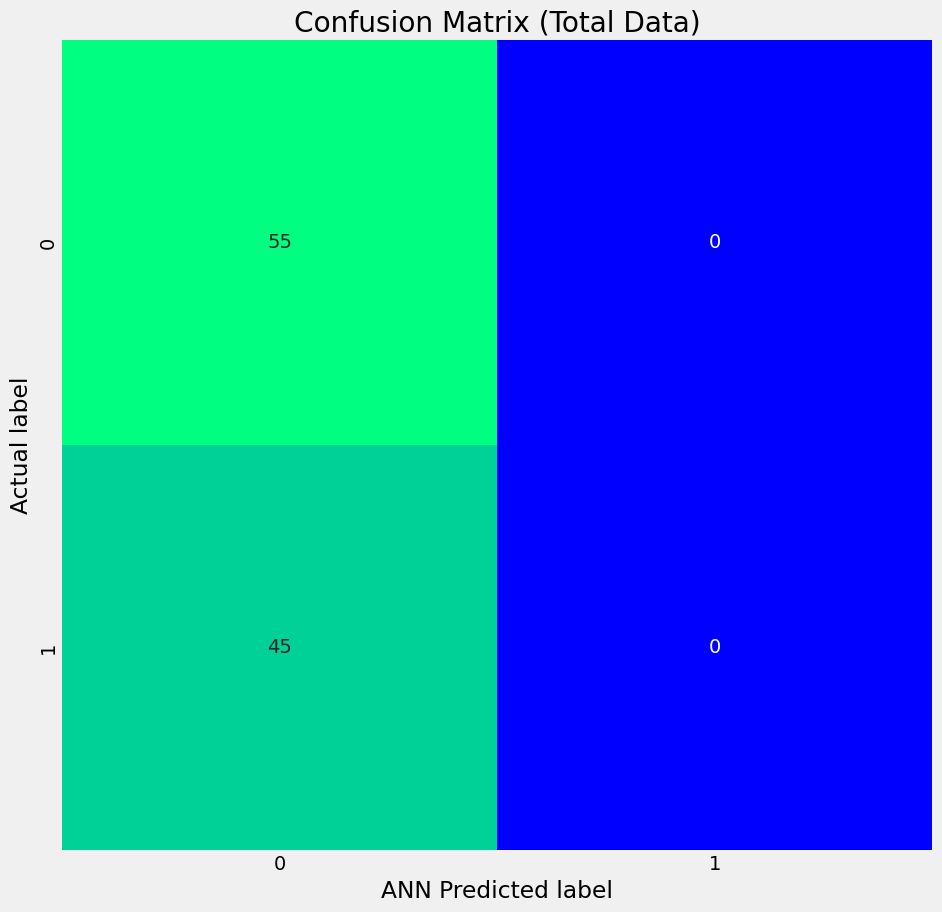

In [195]:
# Dibagian ini kita akan membuat plot untuk matriks konfusion yang telah kita buat
plt.figure(figsize=(10,10 ))
sns.heatmap(conf_matrix_total, annot=True, fmt='d', cmap='winter', cbar=False)
plt.xlabel('ANN Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (Total Data)')
plt.show()



4.   Laporan Klasifikasi



In [192]:
# Dibagian ini kita akan menampilkan laporan klasifikasi
class_report_total = classification_report(y_test_binary, y_pred_class)
print("Classification Report (Total Data):\n", class_report_total)

Classification Report (Total Data):
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        55
           1       0.00      0.00      0.00        45

    accuracy                           0.55       100
   macro avg       0.28      0.50      0.35       100
weighted avg       0.30      0.55      0.39       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sekian saja yang bisa saya lakukan, saya harap kalian bisa lebih mengembangkan dari apa yang sudah saya buat. Thanks and see you next time.